In [10]:
import regionmask
from cmip6_preprocessing.preprocessing import combined_preprocessing
import intake
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [11]:
# load an example dataset
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")
cat = col.search(
    source_id='CESM2',
    variable_id='tos',
    grid_label='gn',
    experiment_id='historical',
    member_id='r1i1p1f1'
)

ddict = cat.to_dataset_dict(preprocess=combined_preprocessing)
ds = ddict['CMIP.NCAR.CESM2.historical.Omon.gn']


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


<GeoAxesSubplot:>

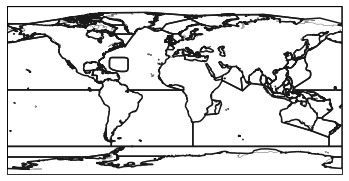

In [12]:
# load ocean basin data
basins = regionmask.defined_regions.natural_earth.ocean_basins_50
basins.plot(add_ocean=False, add_label=False)

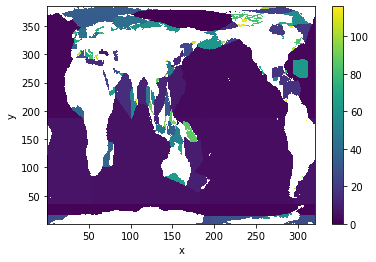

In [13]:
# this 'colors in' each grid box based on the region number
mask = basins.mask(ds)
mask.plot()

Now the only thing you need to do is find the number that corresponds to your region of interest

In [14]:
[(ri, r) for ri, r in zip(basins.region_ids, basins.abbrevs) if 'Arabian' in r]

[(15, 'Arabian Sea')]

/srv/conda/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


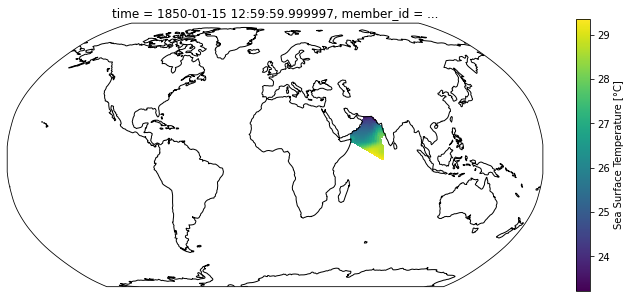

In [18]:
# Mask out only the arabian sea
mask_arabian_sea = mask==15

# plot results to make sure this is selected properly
fig,ax = plt.subplots(subplot_kw={'projection':ccrs.Robinson()}, figsize=[12,5])
ds.tos.isel(time=0).where(mask_arabian_sea).plot(x='lon', y='lat', transform=ccrs.PlateCarree())
ax.coastlines()

![](https://media.giphy.com/media/SYzDscQMN98G0LUHib/giphy.gif)